# Powerlifting Dataset
### Aim:
To explore what factors can affect how much a perso can lift in each of the three powerlifting lifts: Squat, Bench, Deadlift. Therefore I will only want to be looking at traditional events where competitors do all three of these lifts.

### Importing packages and reading-in data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [3]:
data=pd.read_csv('data/openpowerlifting_rawdata.csv')
df=data.copy()

### A general overview of the data

In [4]:
print('Number of row & cols:', df.shape, '\n\n\n')
print('Column names:', df.columns, '\n\n\n')
print('Number of null values''\n', df.isna().sum(), '\n\n\n')
display(df.info())
display(df.describe())
display(df.head())
display(df.tail())

Number of row & cols: (2490480, 41) 



Column names: Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName'],
      dtype='object') 



Number of null values
 Name                      0
Sex                       0
Event                     0
Equipment                 0
Age                  956802
AgeClass             725650
BirthYearClass       899871
Division               2298
BodyweightKg          31972
WeightClassKg         27666
Squat1Kg            1902092
Squat2Kg  

None

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
count,1.533678e+06,2.458508e+06,588388.000000,581468.000000,564215.000000,6390.000000,1.637161e+06,996559.000000,984243.000000,951994.000000,17493.000000,2.188969e+06,674579.000000,661080.000000,629918.000000,16785.000000,1.769351e+06,2.313914e+06,2.292866e+06,2.292866e+06,2.292866e+06,2.091603e+06
mean,3.076033e+01,8.391864e+01,112.264279,92.908537,33.257512,73.450153,1.740733e+02,83.328699,55.319925,-17.664682,23.202371,1.187489e+02,159.213362,130.116612,17.632043,77.370455,1.884638e+02,3.735858e+02,2.719844e+02,2.710099e+02,2.555379e+02,6.361873e+01
std,1.315271e+01,2.272218e+01,143.121316,168.200380,195.235692,186.453532,6.976930e+01,103.748894,128.495033,142.669157,163.592942,5.471657e+01,109.352036,159.221711,211.901151,188.953737,6.255161e+01,2.065137e+02,1.300306e+02,1.295332e+02,1.231954e+02,1.627563e+01
min,0.000000e+00,1.510000e+01,-555.000000,-580.000000,-600.500000,-550.000000,-5.080200e+02,-505.000000,-575.000000,-575.000000,-515.000000,-5.225000e+02,-461.000000,-470.000000,-587.500000,-461.000000,-4.100000e+02,1.000000e+00,6.800000e-01,6.700000e-01,6.400000e-01,5.000000e-01
25%,2.050000e+01,6.695000e+01,87.500000,70.000000,-160.000000,-97.500000,1.224700e+02,55.000000,-50.000000,-137.500000,-125.000000,7.500000e+01,125.000000,115.000000,-205.000000,-100.500000,1.400000e+02,1.975000e+02,1.398000e+02,1.391700e+02,1.319700e+02,5.185000e+01
50%,2.750000e+01,8.190000e+01,145.000000,142.900000,110.000000,131.540000,1.700000e+02,105.000000,95.000000,-60.000000,75.000000,1.150000e+02,180.000000,175.000000,120.000000,142.500000,1.875000e+02,3.475000e+02,2.926300e+02,2.917900e+02,2.722800e+02,6.332000e+01
75%,3.850000e+01,9.880000e+01,200.000000,202.500000,190.000000,200.000000,2.199900e+02,145.000000,145.000000,120.000000,155.000000,1.525000e+02,225.000000,230.000000,205.000000,206.000000,2.336000e+02,5.300000e+02,3.704300e+02,3.688700e+02,3.494200e+02,7.495000e+01
max,9.800000e+01,2.602000e+02,555.000000,577.500000,595.000000,592.390000,5.950000e+02,490.000000,487.500000,500.000000,487.610000,5.034900e+02,450.000000,460.400000,457.500000,440.500000,4.604000e+02,1.407500e+03,7.952200e+02,7.933300e+02,7.569000e+02,1.531600e+02


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Dominik Gabriel,M,B,Raw,17.0,16-17,14-18,T 16-17,102.5,110,NaN,NaN,NaN,NaN,NaN,120.0,130.0,-140.0,NaN,130.0,NaN,NaN,NaN,NaN,NaN,130.0,1,79.18,78.36,74.83,58.87,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
1,Marek Herák,M,B,Multi-ply,19.0,18-19,19-23,T 18-19,59.8,60,NaN,NaN,NaN,NaN,NaN,165.0,-175.0,175.0,-180.0,175.0,NaN,NaN,NaN,NaN,NaN,175.0,1,148.11,149.71,146.22,84.82,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
2,Miroslav Adamove,M,B,Multi-ply,18.0,18-19,14-18,T 18-19,87.7,90,NaN,NaN,NaN,NaN,NaN,250.0,-270.0,-270.0,NaN,250.0,NaN,NaN,NaN,NaN,NaN,250.0,1,163.81,161.77,155.22,85.72,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
3,Kamil Lipiňski,M,B,Multi-ply,19.0,18-19,19-23,T 18-19,89.5,90,NaN,NaN,NaN,NaN,NaN,-170.0,-180.0,-180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DQ,NaN,NaN,NaN,NaN,NaN,Poland,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
4,Gabriel Kováč,M,B,Multi-ply,20.0,20-23,19-23,Juniors,81.6,82.5,NaN,NaN,NaN,NaN,NaN,260.0,280.0,-290.0,NaN,280.0,NaN,NaN,NaN,NaN,NaN,280.0,1,190.86,188.82,181.77,100.89,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
2490475,Fady Meilad,M,SBD,Raw,34.5,24-34,24-39,Open,94.5,105,200.0,210.0,-225.0,NaN,210.0,150.0,160.0,-165.0,NaN,160.0,230.0,250.0,-255.0,NaN,250.0,620.0,2,391.49,386.58,369.78,80.48,Yes,Egypt,NaN,AfricanPF,IPF,2015-10-24,Morocco,NaN,Meknes,African Classic Powerlifting Championships
2490476,Mohamed Omar,M,SBD,Raw,30.5,24-34,24-39,Open,110.3,120,150.0,NaN,NaN,NaN,150.0,-100.0,100.0,115.0,NaN,115.0,-230.0,240.0,-265.0,NaN,240.0,505.0,2,298.79,296.94,283.83,60.95,Yes,Egypt,NaN,AfricanPF,IPF,2015-10-24,Morocco,NaN,Meknes,African Classic Powerlifting Championships
2490477,Boudjemaa Nait Ladjemil,M,SBD,Raw,33.5,24-34,24-39,Open,116.4,120,270.0,290.0,-300.0,NaN,290.0,170.0,177.5,182.5,NaN,182.5,280.0,300.0,312.5,NaN,312.5,785.0,1,455.52,454.68,435.41,92.48,Yes,Algeria,NaN,AfricanPF,IPF,2015-10-24,Morocco,NaN,Meknes,African Classic Powerlifting Championships
2490478,Mohamed Eldeken,M,SBD,Raw,38.5,35-39,24-39,Open,128.3,120+,150.0,NaN,NaN,NaN,150.0,100.0,NaN,NaN,NaN,100.0,150.0,NaN,NaN,NaN,150.0,400.0,2,224.87,226.78,216.80,45.19,Yes,Egypt,NaN,AfricanPF,IPF,2015-10-24,Morocco,NaN,Meknes,African Classic Powerlifting Championships
2490479,Mohamed Bouafia,M,SBD,Raw,38.0,35-39,24-39,Open,130.5,120+,350.0,375.0,390.0,NaN,390.0,210.0,220.0,222.5,NaN,222.5,335.0,355.0,-367.5,NaN,355.0,967.5,1,541.12,546.84,522.26,108.52,Yes,Algeria,NaN,AfricanPF,IPF,2015-10-24,Morocco,NaN,Meknes,African Classic Powerlifting Championships


### Cleaning and manipulating

In [5]:
#Cols to remove:
# Dots, Glossbrenner, Goodlift (same as Wilks), BirthYearClass, Division, State,
# ParentFederaton, MeetCountry, MeetState, MeetTown
#4th attempts as they are not typical to a meet 
cols_to_drop=['BirthYearClass', 'Division','Dots', 'Glossbrenner', 'Goodlift', 'State', 'ParentFederation',
             'MeetCountry', 'MeetState', 'MeetTown', 'Squat4Kg', 'Bench4Kg', 'Deadlift4Kg']
df=df.drop(cols_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490480 entries, 0 to 2490479
Data columns (total 28 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Name             object 
 1   Sex              object 
 2   Event            object 
 3   Equipment        object 
 4   Age              float64
 5   AgeClass         object 
 6   BodyweightKg     float64
 7   WeightClassKg    object 
 8   Squat1Kg         float64
 9   Squat2Kg         float64
 10  Squat3Kg         float64
 11  Best3SquatKg     float64
 12  Bench1Kg         float64
 13  Bench2Kg         float64
 14  Bench3Kg         float64
 15  Best3BenchKg     float64
 16  Deadlift1Kg      float64
 17  Deadlift2Kg      float64
 18  Deadlift3Kg      float64
 19  Best3DeadliftKg  float64
 20  TotalKg          float64
 21  Place            object 
 22  Wilks            float64
 23  Tested           object 
 24  Country          object 
 25  Federation       object 
 26  Date             object 
 27  MeetName    

In [6]:
df.head(2)

,Name,Sex,Event,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,Tested,Country,Federation,Date,MeetName
0,Dominik Gabriel,M,B,Raw,17.0,16-17,102.5,110,NaN,NaN,NaN,NaN,120.0,130.0,-140.0,130.0,NaN,NaN,NaN,NaN,130.0,1,78.36,NaN,Slovakia,WUAP,2015-06-16,European Championships
1,Marek Herák,M,B,Multi-ply,19.0,18-19,59.8,60,NaN,NaN,NaN,NaN,165.0,-175.0,175.0,175.0,NaN,NaN,NaN,NaN,175.0,1,149.71,NaN,Slovakia,WUAP,2015-06-16,European Championships


In [7]:
df['Sex'].unique()

array(['M', 'F', 'Mx'], dtype=object)

In [8]:
#only 20 non male/female 
df[df['Sex']=='Mx'].shape

(20, 28)

In [9]:
df=df[df['Sex']!='Mx']
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [10]:
#making 'Sex' col numerical
df['IsMale'] = df['Sex'].apply(lambda x: 1 if x == 'M' else 0)


In [11]:
#making 'Tested' col numerical
df['Tested'].unique()

array([nan, 'Yes'], dtype=object)

In [12]:
df['IsTested']=df['Tested'].map({np.nan:0, 'Yes':1})
df.head(2)

,Name,Sex,Event,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,Tested,Country,Federation,Date,MeetName,IsMale,IsTested
0,Dominik Gabriel,M,B,Raw,17.0,16-17,102.5,110,NaN,NaN,NaN,NaN,120.0,130.0,-140.0,130.0,NaN,NaN,NaN,NaN,130.0,1,78.36,NaN,Slovakia,WUAP,2015-06-16,European Championships,1,0
1,Marek Herák,M,B,Multi-ply,19.0,18-19,59.8,60,NaN,NaN,NaN,NaN,165.0,-175.0,175.0,175.0,NaN,NaN,NaN,NaN,175.0,1,149.71,NaN,Slovakia,WUAP,2015-06-16,European Championships,1,0


In [13]:
#rounding of columns
df['Age']=df['Age'].round(0)
df['BodyweightKg']=df['BodyweightKg'].round(1)

In [14]:
#Only interested in full SBD events 
df_SBD=df[df['Event']=='SBD']
display(df_SBD.sample(5))
display(df_SBD.shape)

,Name,Sex,Event,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,Tested,Country,Federation,Date,MeetName,IsMale,IsTested
200456,Jason Wiroll,M,SBD,Single-ply,NaN,NaN,81.3,82.1,NaN,NaN,NaN,138.35,NaN,NaN,NaN,70.31,NaN,NaN,NaN,154.22,362.87,23,245.30,Yes,NaN,THSPA,2017-01-21,Princeton Panther Invitational,1,1
2253640,G. Morrisey,M,SBD,Single-ply,NaN,NaN,67.5,67.5,NaN,NaN,NaN,167.50,NaN,NaN,NaN,85.00,NaN,NaN,NaN,170.00,422.50,4,325.75,NaN,Australia,AusPF,1993-05-01,Masters Games/Australian Masters Championships,1,0
577479,Ivan Goltsman,M,SBD,Raw,20.0,20-23,76.8,83,NaN,NaN,NaN,140.00,NaN,NaN,NaN,135.00,NaN,NaN,NaN,160.00,435.00,14,305.11,Yes,NaN,FPR,2017-06-03,Novosibirsk Oblast Classic Powerlifting & Benc...,1,1
1730818,Yelena Espinoza,F,SBD,Raw,22.0,20-23,54.3,57,87.5,95.0,105.0,105.00,60.0,-65.0,65.0,65.00,150.0,157.5,165.0,165.00,335.00,1,403.80,Yes,USA,USAPL,2019-04-06,Maryland State Championships,0,1
706953,Shannon Ross,M,SBD,Wraps,NaN,NaN,108.6,110,NaN,NaN,NaN,222.50,NaN,NaN,NaN,160.00,NaN,NaN,NaN,227.50,610.00,1,360.43,Yes,USA,RPS,2018-03-10,No Retreat No Surrender,1,1


(1700122, 30)

In [15]:
#majority of entries dont have 1st, 2nd, 3rd attempts, just the best result.
df_SBD.isna().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 794336
AgeClass            602056
BodyweightKg         21893
WeightClassKg        16342
Squat1Kg           1121769
Squat2Kg           1128351
Squat3Kg           1144952
Best3SquatKg         79960
Bench1Kg           1130311
Bench2Kg           1136979
Bench3Kg           1154323
Best3BenchKg        108533
Deadlift1Kg        1135457
Deadlift2Kg        1146579
Deadlift3Kg        1171070
Best3DeadliftKg     119810
TotalKg             133942
Place                    0
Wilks               145776
Tested              370148
Country             886726
Federation               0
Date                     0
MeetName                 0
IsMale                   0
IsTested                 0
dtype: int64

In [16]:
SBD_attempts=['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 
              'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 
              'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']
df_best_SBD=df_SBD.drop(SBD_attempts, axis=1)
display(df_best_SBD.sample(3))
display(df_best_SBD.isna().sum())

,Name,Sex,Event,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Wilks,Tested,Country,Federation,Date,MeetName,IsMale,IsTested
205412,Anthony Smith #7,M,SBD,Single-ply,NaN,NaN,66.6,67.1,113.4,74.84,129.27,317.51,9,247.38,Yes,NaN,THSPA,2011-02-19,Highland Park Scot Classic,1,1
1707434,Emilee Lara,F,SBD,Raw,20.0,20-23,95.7,84+,113.4,52.20,113.40,279.00,1,235.54,Yes,USA,USAPL,2017-12-09,17th Annual Ketchikan Winter Meet,0,1
470168,Anna Kuznetsova,F,SBD,Raw,18.0,18-19,59.8,63,75.0,30.00,75.00,180.00,6,201.33,Yes,Russia,FPR,2021-04-22,Krasnoyarsk Krai Powerlifting Championships,0,1


Name                    0
Sex                     0
Event                   0
Equipment               0
Age                794336
AgeClass           602056
BodyweightKg        21893
WeightClassKg       16342
Best3SquatKg        79960
Best3BenchKg       108533
Best3DeadliftKg    119810
TotalKg            133942
Place                   0
Wilks              145776
Tested             370148
Country            886726
Federation              0
Date                    0
MeetName                0
IsMale                  0
IsTested                0
dtype: int64

In [17]:
#Splitting lifts into separate dataframes
squat_cols_to_drop=['Best3BenchKg', 'Best3DeadliftKg', 'Federation', 'Date', 'MeetName']
bench_cols_to_drop=['Best3SquatKg', 'Best3DeadliftKg', 'Federation', 'Date', 'MeetName']
deadlift_cols_to_drop=['Best3SquatKg', 'Best3BenchKg', 'Federation', 'Date', 'MeetName']

In [18]:
#to get rid of scientific notation in th describe function
pd.options.display.float_format = '{:.2f}'.format

In [19]:
df_best_squat=df_best_SBD.drop(squat_cols_to_drop, axis=1)
df_best_bench=df_best_SBD.drop(bench_cols_to_drop, axis=1)
df_best_deadlift=df_best_SBD.drop(deadlift_cols_to_drop, axis=1)

print('SQUAT')
display(df_best_squat.sample(3))
display(df_best_squat.describe())
print('\n\n')
print('BENCH')
display(df_best_bench.sample(3))
display(df_best_bench.describe())
print('\n\n')
print('DEADLIFT')
display(df_best_deadlift.sample(3))
display(df_best_deadlift.describe())

SQUAT


,Name,Sex,Event,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Best3SquatKg,TotalKg,Place,Wilks,Tested,Country,IsMale,IsTested
955672,Budgie Mullan,M,SBD,Raw,69.00,65-69,66.60,67.5,80.00,nan,DQ,nan,NaN,UK,1,0
1879900,Aurore Choron,F,SBD,Single-ply,16.00,16-17,83.00,90,90.00,272.50,3,244.40,Yes,France,0,1
580811,Denis Kvitko,M,SBD,Raw,16.00,16-17,80.80,83,190.00,537.50,3,364.67,Yes,Russia,1,1


,Age,BodyweightKg,Best3SquatKg,TotalKg,Wilks,IsMale,IsTested
count,905786.00,1678229.00,1620162.00,1566180.00,1554346.00,1700122.00,1700122.00
mean,28.62,82.67,174.13,472.84,345.42,0.73,0.78
std,12.07,22.62,69.80,172.02,81.38,0.44,0.41
min,0.00,17.70,-508.02,25.00,28.23,0.00,0.00
25%,20.00,65.90,122.47,335.00,288.47,0.00,1.00
50%,25.00,80.90,170.00,465.00,341.53,1.00,1.00
75%,35.00,97.50,219.99,590.00,397.51,1.00,1.00
max,96.00,260.00,595.00,1407.50,793.33,1.00,1.00





BENCH


,Name,Sex,Event,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Best3BenchKg,TotalKg,Place,Wilks,Tested,Country,IsMale,IsTested
588022,Anna Terentyeva,F,SBD,Single-ply,28.00,24-34,75.00,75,145.00,577.50,1,548.99,Yes,Russia,0,1
1203192,Rachel Salters,F,SBD,Single-ply,nan,NaN,69.80,75,nan,nan,DQ,nan,Yes,NaN,0,1
1625917,Matthew Rice,M,SBD,Wraps,28.00,24-34,125.80,140,140.61,684.92,1,389.81,Yes,NaN,1,1


,Age,BodyweightKg,Best3BenchKg,TotalKg,Wilks,IsMale,IsTested
count,905786.00,1678229.00,1591589.00,1566180.00,1554346.00,1700122.00,1700122.00
mean,28.62,82.67,110.42,472.84,345.42,0.73,0.78
std,12.07,22.62,49.99,172.02,81.38,0.44,0.41
min,0.00,17.70,-365.00,25.00,28.23,0.00,0.00
25%,20.00,65.90,70.00,335.00,288.47,0.00,1.00
50%,25.00,80.90,107.50,465.00,341.53,1.00,1.00
75%,35.00,97.50,142.50,590.00,397.51,1.00,1.00
max,96.00,260.00,472.50,1407.50,793.33,1.00,1.00





DEADLIFT


,Name,Sex,Event,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Best3DeadliftKg,TotalKg,Place,Wilks,Tested,Country,IsMale,IsTested
1734395,Keith Stroud,M,SBD,Raw,12.00,13-15,66.40,74,115.00,250.00,1,195.33,Yes,USA,1,1
2191024,Drew Dowd,M,SBD,Raw,24.00,24-34,89.00,90,282.50,695.00,1,446.24,NaN,USA,1,0
1092857,Andy Cusick,M,SBD,Multi-ply,32.00,24-34,89.90,90,290.00,790.00,6,504.62,NaN,NaN,1,0


,Age,BodyweightKg,Best3DeadliftKg,TotalKg,Wilks,IsMale,IsTested
count,905786.00,1678229.00,1580312.00,1566180.00,1554346.00,1700122.00,1700122.00
mean,28.62,82.67,187.38,472.84,345.42,0.73,0.78
std,12.07,22.62,62.00,172.02,81.38,0.44,0.41
min,0.00,17.70,-370.00,25.00,28.23,0.00,0.00
25%,20.00,65.90,138.35,335.00,288.47,0.00,1.00
50%,25.00,80.90,185.00,465.00,341.53,1.00,1.00
75%,35.00,97.50,231.33,590.00,397.51,1.00,1.00
max,96.00,260.00,457.50,1407.50,793.33,1.00,1.00


In [20]:
#new df with removed nans and negatives. Not deleting, might need them for other analysis
whole_best_squat=df_best_squat[df_best_squat['Best3SquatKg']>0]
whole_best_squat=whole_best_squat.dropna(subset=['Age', 'BodyweightKg', 'Best3SquatKg', 'TotalKg', 'Wilks', 'IsMale'])
whole_best_squat.isna().sum()

Name                  0
Sex                   0
Event                 0
Equipment             0
Age                   0
AgeClass            142
BodyweightKg          0
WeightClassKg      2822
Best3SquatKg          0
TotalKg               0
Place                 0
Wilks                 0
Tested           221430
Country          231308
IsMale                0
IsTested              0
dtype: int64

In [21]:
#repeating for other 2
whole_best_bench=df_best_bench[df_best_bench['Best3BenchKg']>0]
whole_best_bench=whole_best_bench.dropna(subset=['Age', 'BodyweightKg', 'Best3BenchKg', 'TotalKg', 'Wilks', 'IsMale'])

whole_best_deadlift=df_best_deadlift[df_best_deadlift['Best3DeadliftKg']>0]
whole_best_deadlift=whole_best_deadlift.dropna(subset=['Age', 'BodyweightKg', 'Best3DeadliftKg', 'TotalKg', 'Wilks', 'IsMale'])

In [22]:
print('SQUAT')
display(whole_best_squat.describe())
print('\n')
print('BENCH')
display(whole_best_bench.describe())
print('\n')
print('DEADLIFT')
display(whole_best_deadlift.describe())

SQUAT


,Age,BodyweightKg,Best3SquatKg,TotalKg,Wilks,IsMale,IsTested
count,844640.00,844640.00,844640.00,844640.00,844640.00,844640.00,844640.00
mean,28.62,83.14,183.42,501.61,365.50,0.72,0.74
std,12.10,22.36,71.37,179.39,83.57,0.45,0.44
min,0.00,17.70,1.00,28.60,28.23,0.00,0.00
25%,20.00,66.40,127.50,355.00,309.11,0.00,0.00
50%,25.00,81.40,180.00,500.00,363.30,1.00,1.00
75%,35.00,97.50,230.00,627.50,419.45,1.00,1.00
max,96.00,260.00,595.00,1407.50,793.33,1.00,1.00




BENCH


,Age,BodyweightKg,Best3BenchKg,TotalKg,Wilks,IsMale,IsTested
count,844622.00,844622.00,844622.00,844622.00,844622.00,844622.00,844622.00
mean,28.62,83.14,119.14,501.61,365.50,0.72,0.74
std,12.10,22.36,51.62,179.39,83.57,0.45,0.44
min,0.00,17.70,4.70,28.60,28.23,0.00,0.00
25%,20.00,66.40,75.00,355.00,309.11,0.00,0.00
50%,25.00,81.40,117.50,500.00,363.30,1.00,1.00
75%,35.00,97.50,152.50,627.50,419.45,1.00,1.00
max,96.00,260.00,472.50,1407.50,793.33,1.00,1.00




DEADLIFT


,Age,BodyweightKg,Best3DeadliftKg,TotalKg,Wilks,IsMale,IsTested
count,844619.00,844619.00,844619.00,844619.00,844619.00,844619.00,844619.00
mean,28.62,83.14,199.11,501.62,365.50,0.72,0.74
std,12.10,22.36,62.72,179.39,83.56,0.45,0.44
min,0.00,17.70,7.50,28.60,28.23,0.00,0.00
25%,20.00,66.40,149.69,355.00,309.11,0.00,0.00
50%,25.00,81.40,200.00,500.00,363.30,1.00,1.00
75%,35.00,97.50,245.00,627.50,419.45,1.00,1.00
max,96.00,260.00,457.50,1407.50,793.33,1.00,1.00


In [23]:
#seeing any correlation within these df's
squat_corr=whole_best_squat.corr()
display(squat_corr)
bench_corr=whole_best_bench.corr()
display(bench_corr)
deadlift_corr=whole_best_deadlift.corr()
display(deadlift_corr)

,Age,BodyweightKg,Best3SquatKg,TotalKg,Wilks,IsMale,IsTested
Age,1.00,0.17,0.05,0.08,0.02,0.00,-0.11
BodyweightKg,0.17,1.00,0.65,0.68,0.23,0.45,-0.16
Best3SquatKg,0.05,0.65,1.00,0.98,0.81,0.58,-0.13
TotalKg,0.08,0.68,0.98,1.00,0.79,0.64,-0.14
Wilks,0.02,0.23,0.81,0.79,1.00,0.23,-0.08
IsMale,0.00,0.45,0.58,0.64,0.23,1.00,-0.05
IsTested,-0.11,-0.16,-0.13,-0.14,-0.08,-0.05,1.00


,Age,BodyweightKg,Best3BenchKg,TotalKg,Wilks,IsMale,IsTested
Age,1.00,0.17,0.11,0.08,0.02,0.00,-0.11
BodyweightKg,0.17,1.00,0.67,0.68,0.23,0.45,-0.16
Best3BenchKg,0.11,0.67,1.00,0.95,0.72,0.64,-0.12
TotalKg,0.08,0.68,0.95,1.00,0.79,0.64,-0.14
Wilks,0.02,0.23,0.72,0.79,1.00,0.23,-0.08
IsMale,0.00,0.45,0.64,0.64,0.23,1.00,-0.05
IsTested,-0.11,-0.16,-0.12,-0.14,-0.08,-0.05,1.00


,Age,BodyweightKg,Best3DeadliftKg,TotalKg,Wilks,IsMale,IsTested
Age,1.00,0.17,0.09,0.08,0.02,0.00,-0.11
BodyweightKg,0.17,1.00,0.65,0.68,0.23,0.45,-0.16
Best3DeadliftKg,0.09,0.65,1.00,0.96,0.74,0.65,-0.14
TotalKg,0.08,0.68,0.96,1.00,0.79,0.64,-0.14
Wilks,0.02,0.23,0.74,0.79,1.00,0.23,-0.08
IsMale,0.00,0.45,0.65,0.64,0.23,1.00,-0.05
IsTested,-0.11,-0.16,-0.14,-0.14,-0.08,-0.05,1.00


In [24]:
#group by age, sort by best squat
age_best_squat=whole_best_squat.groupby('Age')['Best3SquatKg'].agg(['count','max', 'mean'])
age_best_squat

,count,max,mean
Age,,,
0.00,85,370.00,198.64
1.00,2,232.50,173.75
2.00,36,301.64,194.96
3.00,6,305.00,185.83
4.00,22,250.00,167.31
...,...,...,...
90.00,5,70.00,41.26
91.00,2,20.00,20.00
92.00,7,65.00,44.29


In [25]:
#group by bodyweight, sort by max squat
weight_best_squat=whole_best_squat.groupby('BodyweightKg')['Best3SquatKg'].agg(['count', 'max', 'mean'])
weight_best_squat

,count,max,mean
BodyweightKg,,,
17.70,1,29.48,29.48
18.00,1,110.00,110.00
18.80,1,31.75,31.75
19.00,1,37.50,37.50
19.50,1,34.93,34.93
...,...,...,...
237.60,1,465.00,465.00
240.00,2,260.00,248.75
242.00,1,242.50,242.50


In [26]:
#group by age, sort by max bench
age_best_bench=whole_best_bench.groupby('Age')['Best3BenchKg'].agg(['count','max', 'mean'])
age_best_bench

,count,max,mean
Age,,,
0.00,85,230.00,134.22
1.00,2,185.00,112.50
2.00,36,217.72,135.56
3.00,6,180.00,122.08
4.00,22,190.00,107.49
...,...,...,...
90.00,5,82.50,48.04
91.00,2,30.00,30.00
92.00,7,70.00,50.00


In [27]:
#group by bodyweight, sort by max bench
weight_best_bench=whole_best_bench.groupby('BodyweightKg')['Best3BenchKg'].agg(['count','max', 'mean'])
weight_best_bench

,count,max,mean
BodyweightKg,,,
17.70,1,15.88,15.88
18.00,1,45.00,45.00
18.80,1,18.14,18.14
19.00,1,30.00,30.00
19.50,1,20.41,20.41
...,...,...,...
237.60,1,340.00,340.00
240.00,2,177.50,157.50
242.00,1,182.50,182.50


In [28]:
#group by age, sort by max deadlift
age_best_deadlift=whole_best_deadlift.groupby('Age')['Best3DeadliftKg'].agg(['count','max', 'mean'])
age_best_deadlift

,count,max,mean
Age,,,
0.00,85,320.00,218.69
1.00,2,250.00,175.00
2.00,36,303.91,214.04
3.00,6,300.00,207.92
4.00,22,262.50,193.08
...,...,...,...
90.00,5,125.00,78.75
91.00,2,40.00,40.00
92.00,7,130.00,89.29


In [29]:
#group by bodyweight, sort by max deadlift
weight_best_deadlift=whole_best_deadlift.groupby('BodyweightKg')['Best3DeadliftKg'].agg(['count','max', 'mean'])
weight_best_deadlift

,count,max,mean
BodyweightKg,,,
17.70,1,29.48,29.48
18.00,1,135.00,135.00
18.80,1,45.36,45.36
19.00,1,52.50,52.50
19.50,1,54.43,54.43
...,...,...,...
237.60,1,295.00,295.00
240.00,2,277.50,263.75
242.00,1,200.00,200.00


## EDA

In [30]:
df_best_SBD.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Wilks,Tested,Country,Federation,Date,MeetName,IsMale,IsTested
180,Tristan Cianni,M,SBD,Multi-ply,18.00,18-19,79.60,82.5,200.00,140.00,200.00,540.00,1,369.83,NaN,Germany,WUAP,2015-06-16,European Championships,1,0
181,Robin Hejl,M,SBD,Multi-ply,18.00,18-19,82.70,90,155.00,100.00,170.00,425.00,1,284.30,NaN,Czechia,WUAP,2015-06-16,European Championships,1,0
182,David Mahovský,M,SBD,Multi-ply,20.00,20-23,73.90,75,310.00,185.00,265.50,760.50,1,547.56,NaN,Czechia,WUAP,2015-06-16,European Championships,1,0
183,Max Braune,M,SBD,Multi-ply,20.00,20-23,75.00,75,185.00,125.00,172.50,482.50,2,343.81,NaN,Germany,WUAP,2015-06-16,European Championships,1,0
184,Milan Mašek,M,SBD,Multi-ply,23.00,20-23,93.00,100,230.00,100.00,200.00,530.00,1,332.94,NaN,Czechia,WUAP,2015-06-16,European Championships,1,0


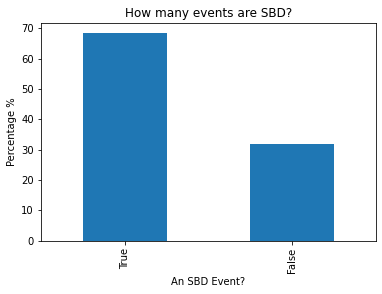

In [31]:
SBD_per=(((df['Event']=='SBD').value_counts())/(df['Event'].shape[0]))*100
plt.figure(figsize=(6, 4))
SBD_per.plot(kind='bar')
plt.title('How many events are SBD?')
plt.xlabel('An SBD Event?')
plt.ylabel('Percentage %')
plt.show()

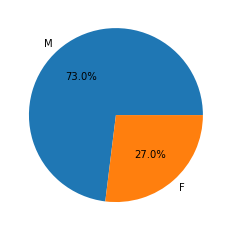

In [32]:
plt.pie(df_best_SBD['Sex'].value_counts(), labels=df_best_SBD['Sex'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [33]:
# number of M/F lifter in SBD events
#females
print(df_best_SBD['IsMale'].count()-df_best_SBD['IsMale'].sum())
#males
print(df_best_SBD['IsMale'].sum())

458253
1241869


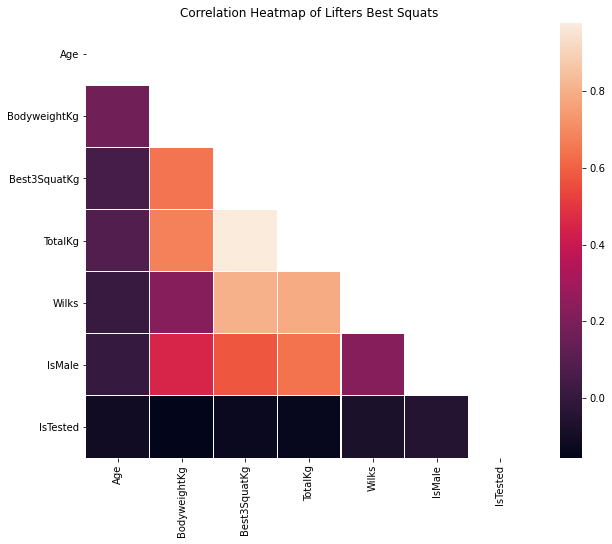

In [34]:
# Correlations for each lift
mask = np.triu(np.ones_like(squat_corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(squat_corr, mask=mask, linewidth=0.1);
plt.title('Correlation Heatmap of Lifters Best Squats')
plt.show()

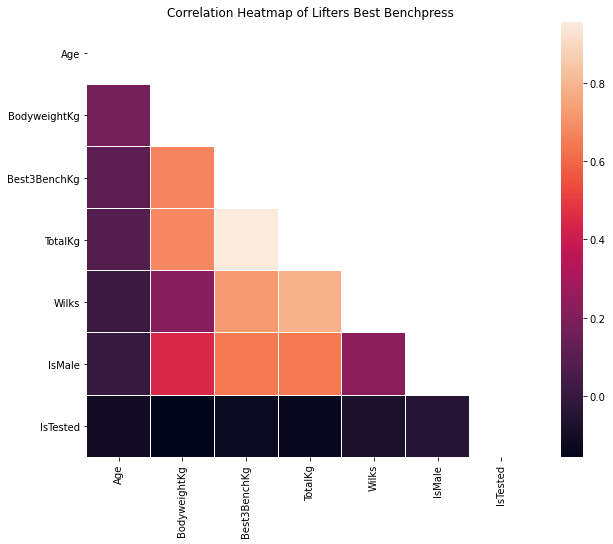

In [35]:
mask = np.triu(np.ones_like(bench_corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(bench_corr, mask=mask, linewidth=0.1);
plt.title('Correlation Heatmap of Lifters Best Benchpress')
plt.show()

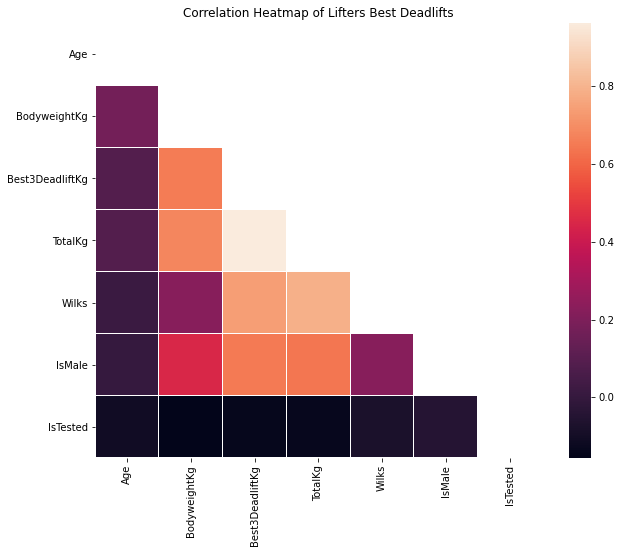

In [36]:
mask = np.triu(np.ones_like(deadlift_corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(deadlift_corr, mask=mask, linewidth=0.1);
plt.title('Correlation Heatmap of Lifters Best Deadlifts')
plt.show()

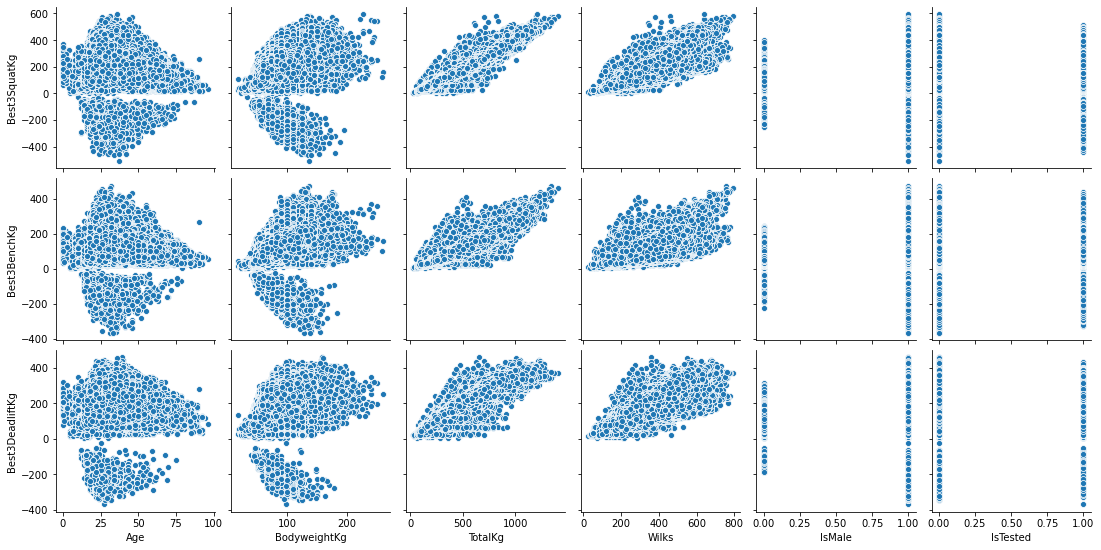

In [37]:
#pairplot comparing each lift to the numerical factors
sns.pairplot(x_vars=['Age', 'BodyweightKg', 'TotalKg', 'Wilks','IsMale', 'IsTested'],
             y_vars=['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg'],
             data=df_best_SBD);

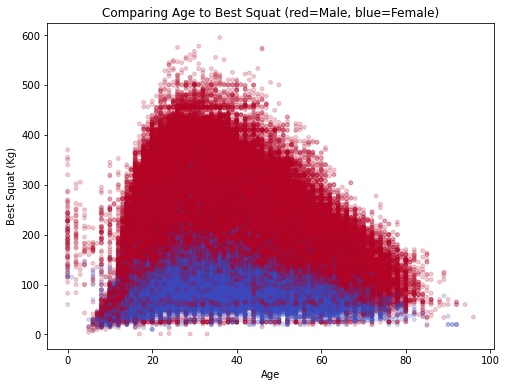

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(x=whole_best_squat['Age'], 
            y=whole_best_squat['Best3SquatKg'],
            c=whole_best_squat['IsMale'],
            s=15,
            alpha=0.2,
            cmap='coolwarm')

plt.title('Comparing Age to Best Squat (red=Male, blue=Female)')
plt.xlabel('Age')
plt.ylabel('Best Squat (Kg)')

plt.show()

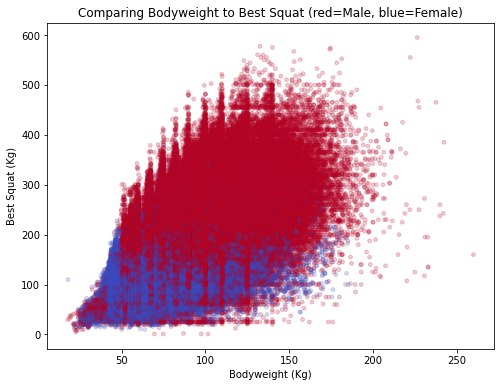

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(x=whole_best_squat['BodyweightKg'], 
            y=whole_best_squat['Best3SquatKg'],
            c=whole_best_squat['IsMale'],
            s=15,
            alpha=0.2,
            cmap='coolwarm')

plt.title('Comparing Bodyweight to Best Squat (red=Male, blue=Female)')
plt.xlabel('Bodyweight (Kg)')
plt.ylabel('Best Squat (Kg)')

plt.show()

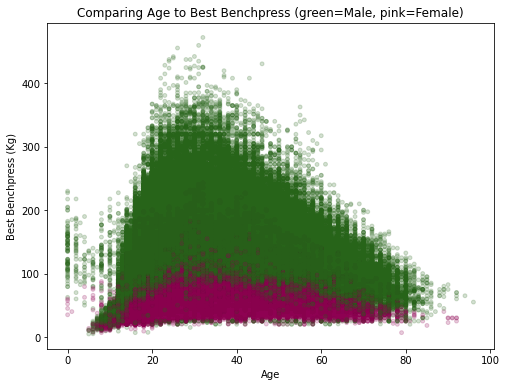

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(x=whole_best_bench['Age'], 
            y=whole_best_bench['Best3BenchKg'],
            c=whole_best_bench['IsMale'],
            s=15,
            alpha=0.2,
            cmap='PiYG')

plt.title('Comparing Age to Best Benchpress (green=Male, pink=Female)')
plt.xlabel('Age')
plt.ylabel('Best Benchpress (Kg)')

plt.show()

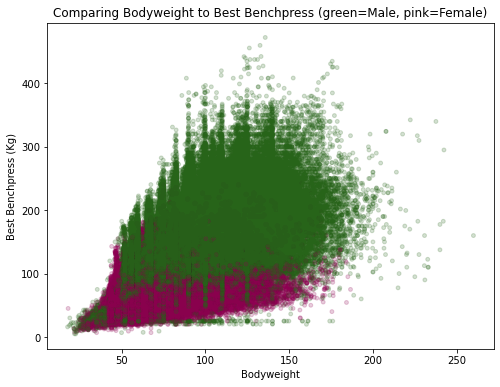

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(x=whole_best_bench['BodyweightKg'], 
            y=whole_best_bench['Best3BenchKg'],
            c=whole_best_bench['IsMale'],
            s=15,
            alpha=0.2,
            cmap='PiYG')

plt.title('Comparing Bodyweight to Best Benchpress (green=Male, pink=Female)')
plt.xlabel('Bodyweight')
plt.ylabel('Best Benchpress (Kg)')

plt.show()

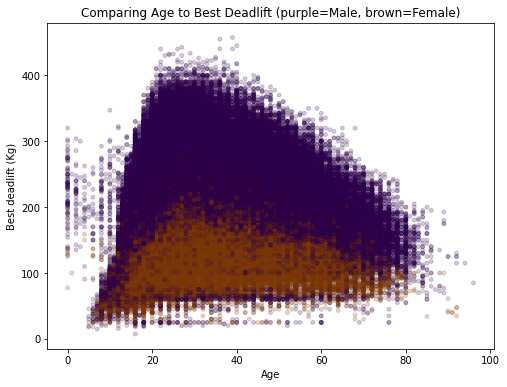

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(x=whole_best_deadlift['Age'], 
            y=whole_best_deadlift['Best3DeadliftKg'],
            c=whole_best_deadlift['IsMale'],
            s=15,
            alpha=0.2,
            cmap='PuOr')

plt.title('Comparing Age to Best Deadlift (purple=Male, brown=Female)')
plt.xlabel('Age')
plt.ylabel('Best deadlift (Kg)')

plt.show()

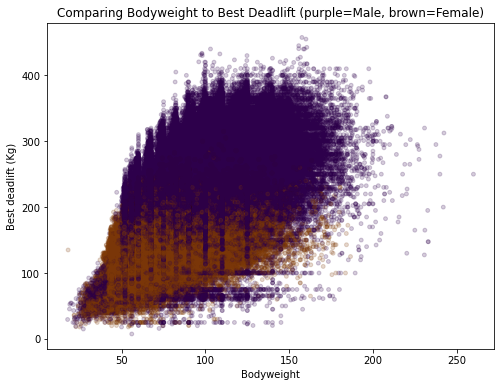

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(x=whole_best_deadlift['BodyweightKg'], 
            y=whole_best_deadlift['Best3DeadliftKg'],
            c=whole_best_deadlift['IsMale'],
            s=15,
            alpha=0.2,
            cmap='PuOr')

plt.title('Comparing Bodyweight to Best Deadlift (purple=Male, brown=Female)')
plt.xlabel('Bodyweight')
plt.ylabel('Best deadlift (Kg)')

plt.show()

In [44]:
#comapring 'Sex' for avg 'Total' and each lift
df_best_SBD.groupby('Sex')['TotalKg'].mean()

Sex
F   299.76
M   537.44
Name: TotalKg, dtype: float64

In [45]:
df_best_SBD.groupby('Sex')['Best3SquatKg'].mean()

Sex
F   112.40
M   197.07
Name: Best3SquatKg, dtype: float64

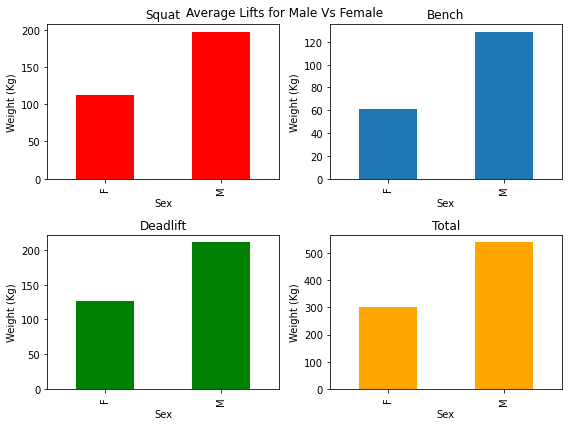

In [46]:
plt.figure(figsize=(8, 6))

plt.subplot(2,2,1)
df_best_SBD.groupby('Sex')['Best3SquatKg'].mean().plot(kind='bar', color='red')
plt.title('Squat')
plt.xlabel('Sex')
plt.ylabel('Weight (Kg)')

plt.subplot(2,2,2)
df_best_SBD.groupby('Sex')['Best3BenchKg'].mean().plot(kind='bar')
plt.title('Bench')
plt.xlabel('Sex')
plt.ylabel('Weight (Kg)')

plt.subplot(2,2,3)
df_best_SBD.groupby('Sex')['Best3DeadliftKg'].mean().plot(kind='bar', color='green')
plt.title('Deadlift')
plt.xlabel('Sex')
plt.ylabel('Weight (Kg)')

plt.subplot(2,2,4)
df_best_SBD.groupby('Sex')['TotalKg'].mean().plot(kind='bar', color='orange')
plt.title('Total')
plt.xlabel('Sex')
plt.ylabel('Weight (Kg)')

plt.suptitle('Average Lifts for Male Vs Female')
plt.tight_layout()
plt.show()

### my notes

In [47]:

#compare all to each SBD and total
# value_count and unique for each column

In [48]:
#MAYBE KEEP FOR ML
# squat_cols_to_drop=['Bench1Kg', 'Bench2Kg', 'Bench3Kg','Best3BenchKg', 
#                     'Deadlift1Kg','Deadlift2Kg', 'Deadlift3Kg',
#                     'Best3DeadliftKg', 'Date', 'MeetName']

# bench_cols_to_drop=['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
#                    'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
#                     'Best3DeadliftKg', 'Date', 'MeetName']

# deadlift_cols_to_drop=['Bench1Kg', 'Bench2Kg', 'Bench3Kg','Best3BenchKg',
#                        'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
#                       'Date', 'MeetName']